In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [236]:
df = pd.read_csv('/Users/mahinbindra/Desktop/Customer_Data.csv')

In [237]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [239]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [240]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [241]:
unknown_columns = df.columns[df.eq('unknown').any()]
unknown_columns

Index([], dtype='object')

In [242]:
df[df['CREDIT_LIMIT'].isnull() & df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [243]:
df2 = df.copy()

In [244]:
minimum_payments_mean = df['MINIMUM_PAYMENTS'].mean()
minimum_payments_mean

864.2065423050828

In [245]:
df2['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

In [246]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [247]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [248]:
df2['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       864.206542
std       2330.588021
min          0.019163
25%        170.857654
50%        335.628312
75%        864.206542
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Since the change is stats is minimal we will go ahead with the imputation..... write more on this

In [249]:
df2[df2['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [250]:
df2.dropna(inplace=True)

In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [252]:
df3 = df2.copy()

In [253]:
from sklearn.decomposition import PCA

In [254]:
df3.drop('CUST_ID', axis = 1, inplace = True)

In [255]:
#scaler = StandardScaler()
#df_std = scaler.fit_transform(df3)

In [256]:
#pca = PCA()
#df_pca = pca.fit_transform(df3)

In [257]:
#df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df3.columns))])

In [258]:
#print('Explained variance ratio:', pca.explained_variance_ratio_)

In [259]:
#cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
#print('Cumulative explained variance ratio:', cumsum_variance)

In [260]:
#df_pca.head()

In [261]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

<Axes: >

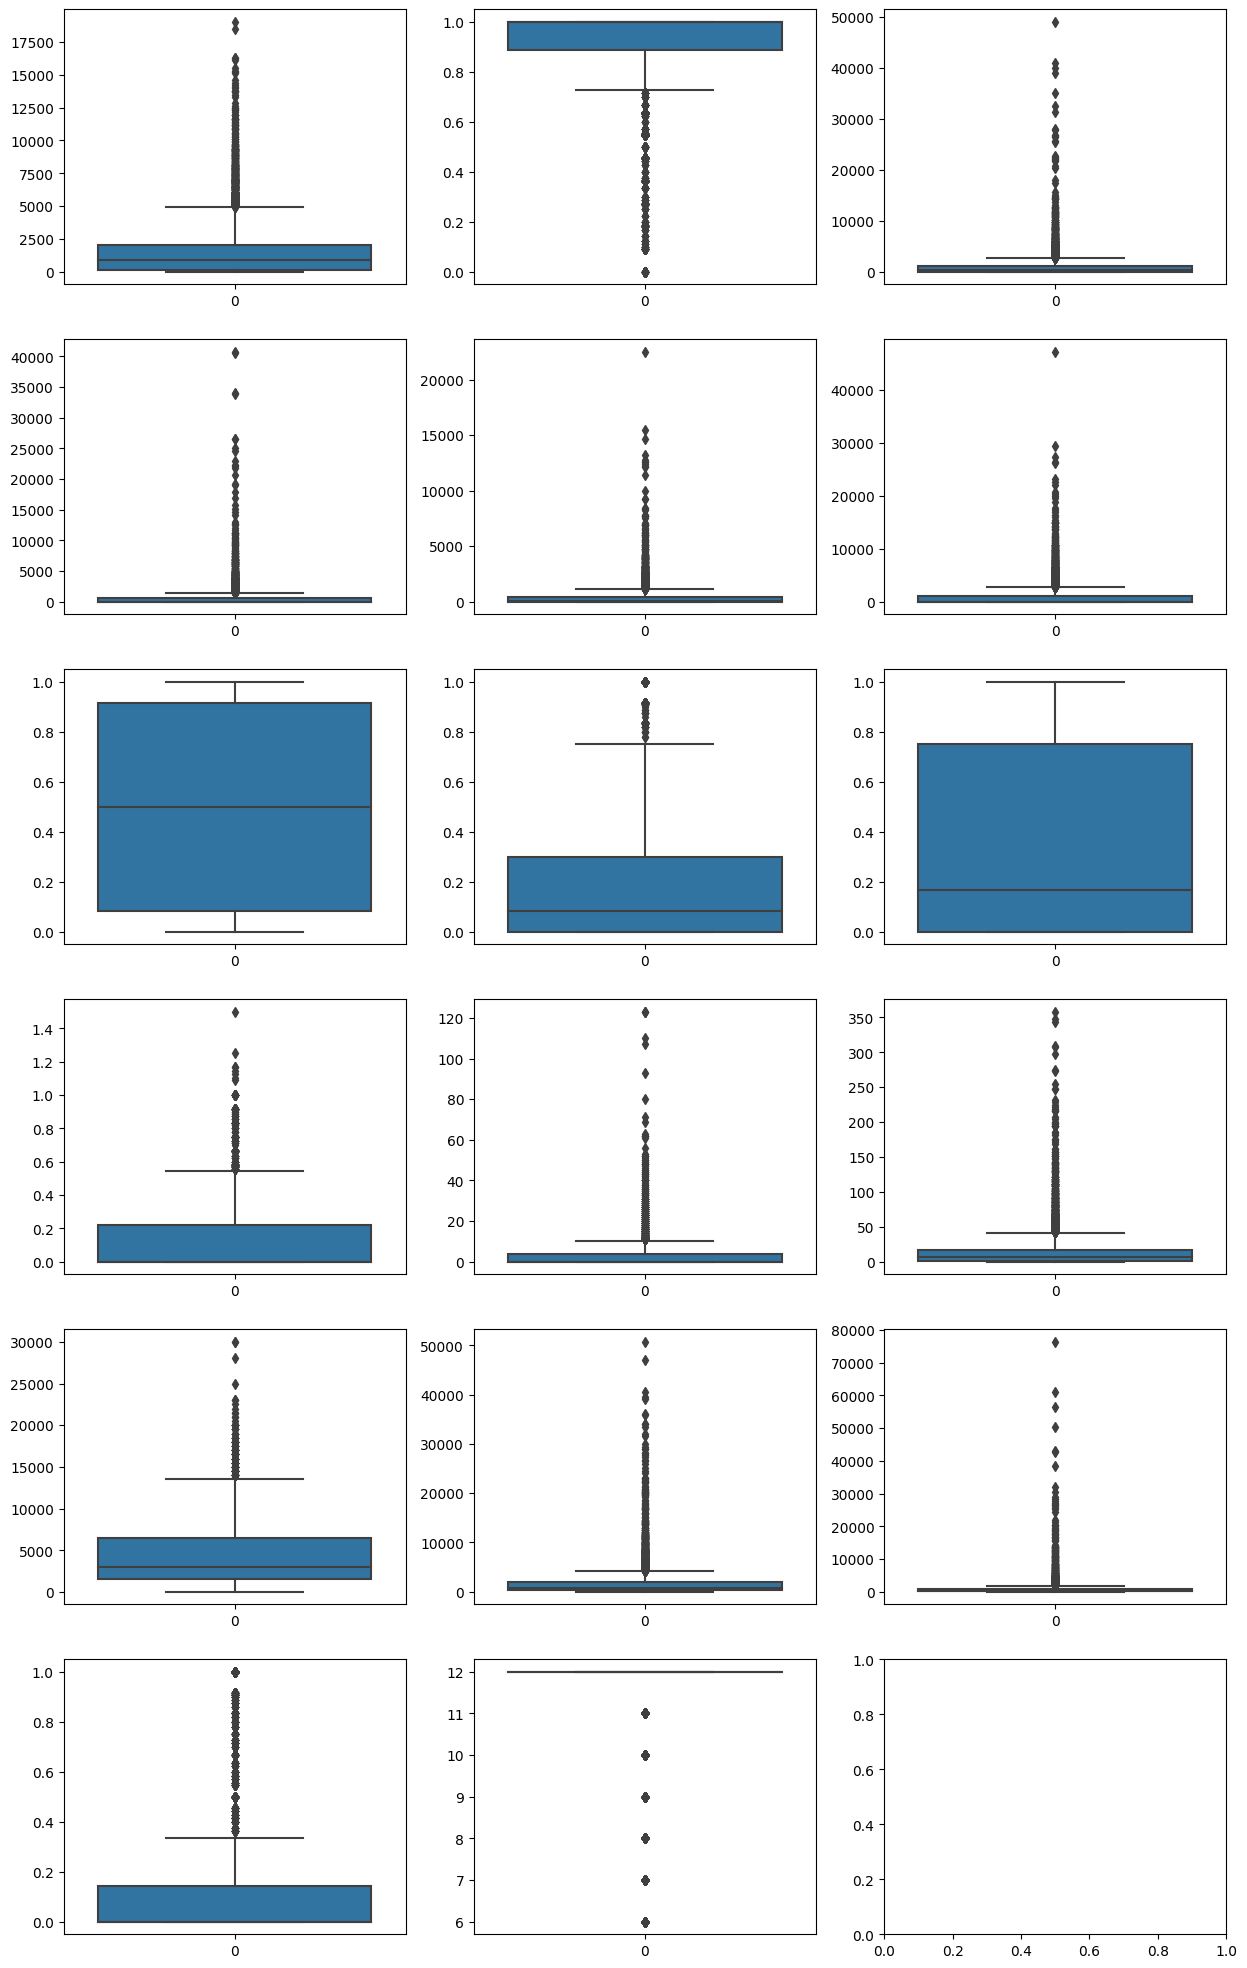

In [262]:
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.boxplot(df2['BALANCE'], ax=axs[0][0])
sns.boxplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.boxplot(df2['PURCHASES'], ax=axs[0][2])
sns.boxplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.boxplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.boxplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.boxplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.boxplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.boxplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.boxplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.boxplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.boxplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.boxplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.boxplot(df2['PAYMENTS'], ax=axs[4][1])
sns.boxplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.boxplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.boxplot(df2['TENURE'], ax=axs[5][1])

<Axes: xlabel='TENURE', ylabel='Count'>

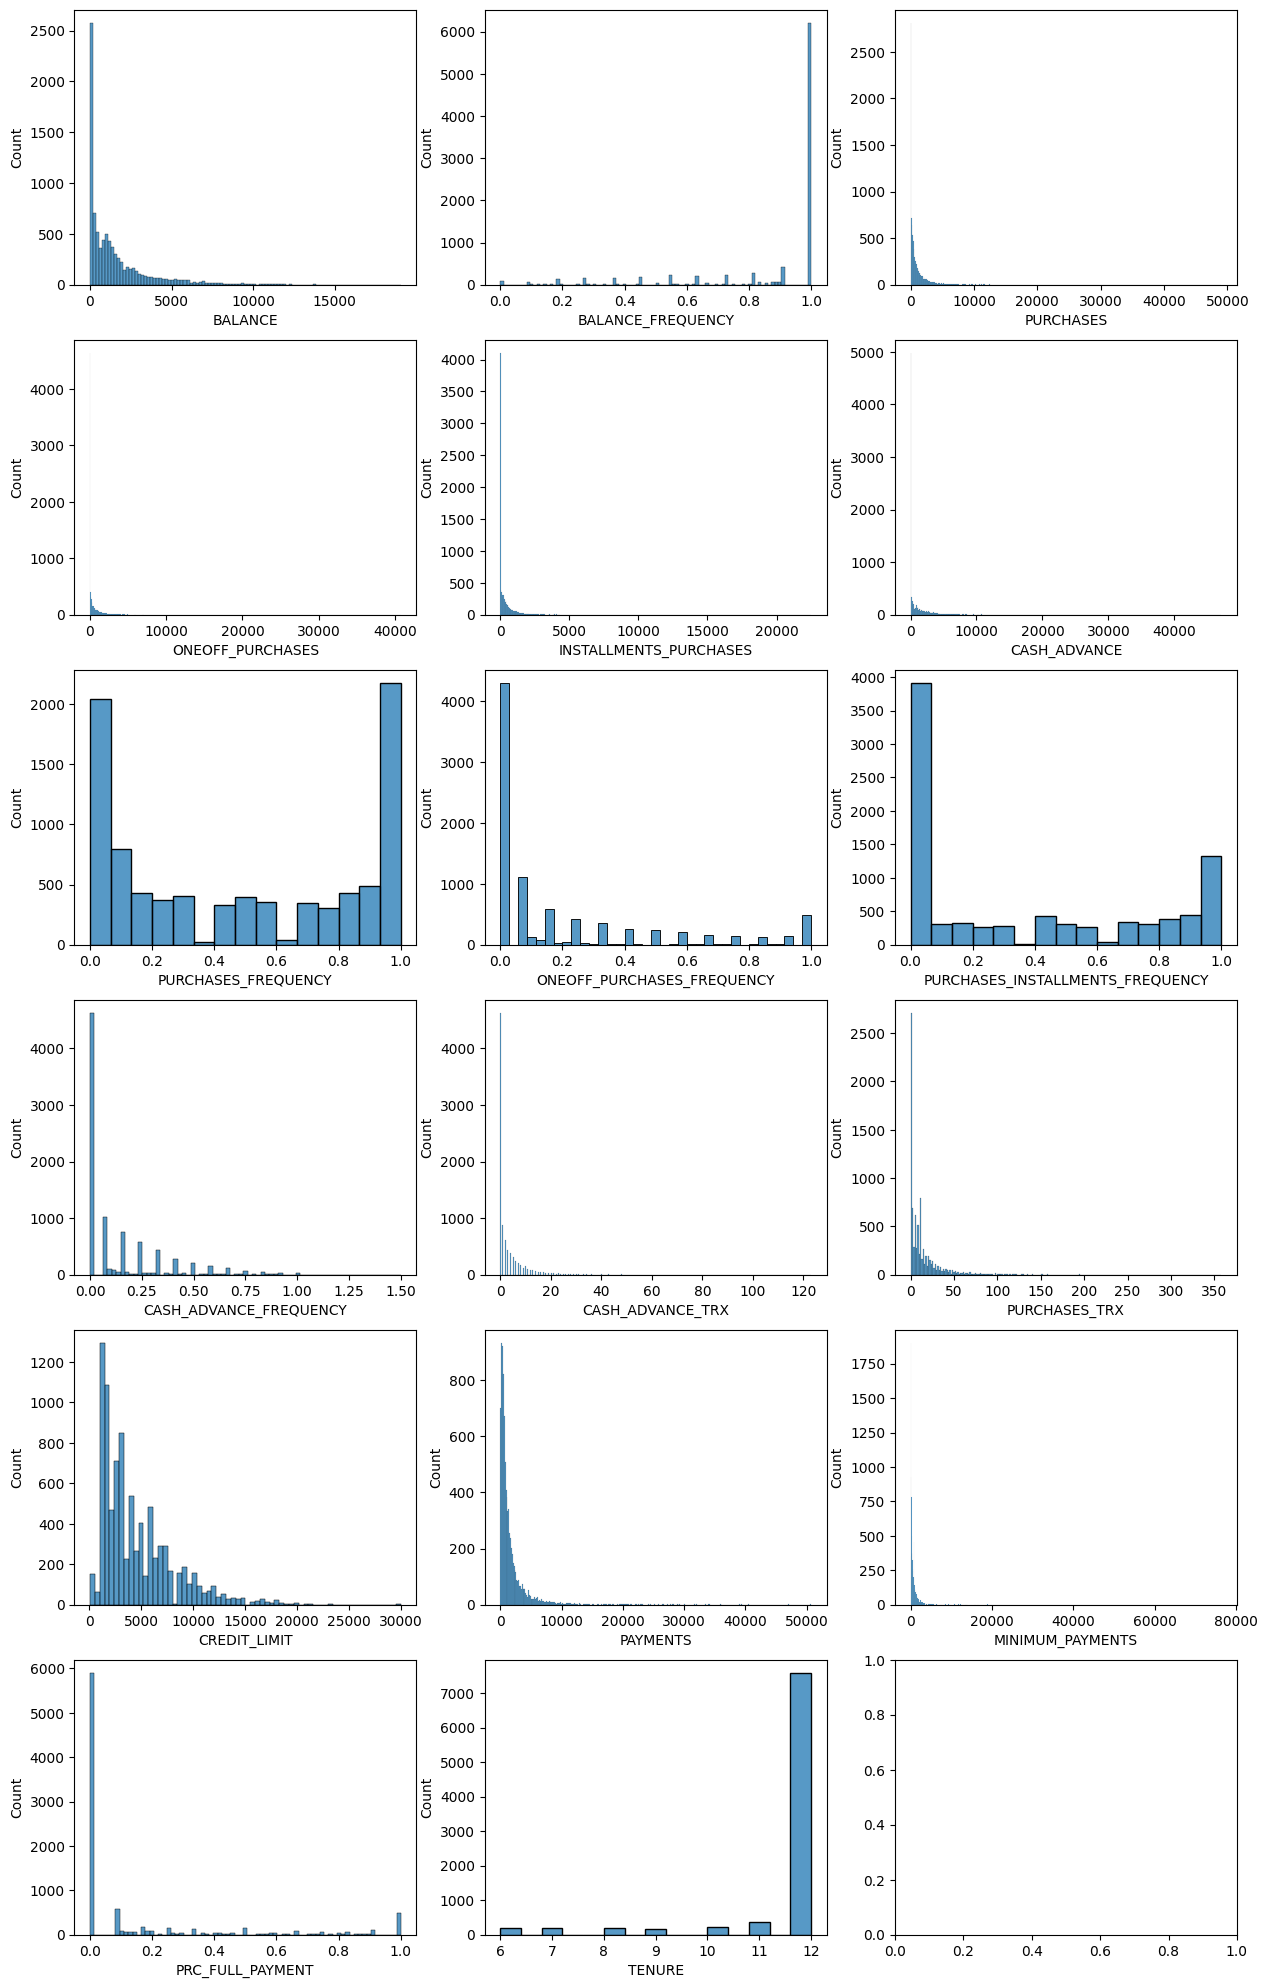

In [263]:
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.histplot(df2['BALANCE'], ax=axs[0][0])
sns.histplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.histplot(df2['PURCHASES'], ax=axs[0][2])
sns.histplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.histplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.histplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.histplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.histplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.histplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.histplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.histplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.histplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.histplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.histplot(df2['PAYMENTS'], ax=axs[4][1])
sns.histplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.histplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.histplot(df2['TENURE'], ax=axs[5][1])

In [264]:
numerical_columns = []

In [265]:
for column, dtype in df2.dtypes.items():
    if dtype in [int, float]:
        numerical_columns.append(column)

In [266]:
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

BALANCE: skewness = 2.39286931104363, kurtosis = 7.669089092457153
BALANCE_FREQUENCY: skewness = -2.023853933829657, kurtosis = 3.0952058031061487
PURCHASES: skewness = 8.14260420160155, kurtosis = 111.3170266701625
ONEOFF_PURCHASES: skewness = 10.042938069144444, kurtosis = 164.07967448656362
INSTALLMENTS_PURCHASES: skewness = 7.297599697990101, kurtosis = 96.51255160068915
CASH_ADVANCE: skewness = 5.165457444186707, kurtosis = 52.86387995303089
PURCHASES_FREQUENCY: skewness = 0.059960065332719345, kurtosis = -1.638365674551192
ONEOFF_PURCHASES_FREQUENCY: skewness = 1.5351955846521053, kurtosis = 1.1600002768226574
PURCHASES_INSTALLMENTS_FREQUENCY: skewness = 0.5089378965346096, kurtosis = -1.3986869029049458
CASH_ADVANCE_FREQUENCY: skewness = 1.8283375947131304, kurtosis = 3.331657585882775
CASH_ADVANCE_TRX: skewness = 5.720017350694568, kurtosis = 61.60526288820158
PURCHASES_TRX: skewness = 4.629717044068625, kurtosis = 34.77049307409807
CREDIT_LIMIT: skewness = 1.522208803328015, k

Let's check various features together now, assuming that 'BALANCE' and 'PAYMENTS' i.e., total balance in a user's account and the total amount of payments made by the user respectively are relatively more important features we will check those two with other features.

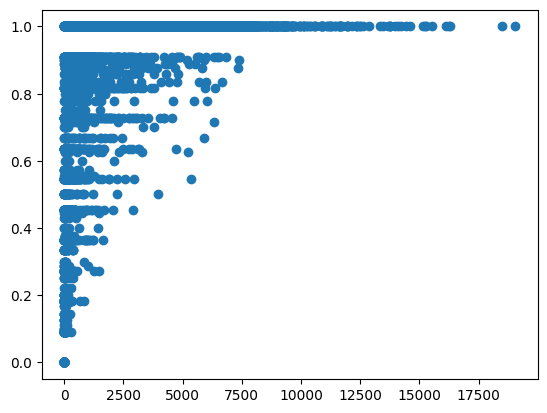

In [267]:
plt.scatter(df2['BALANCE'], df2['BALANCE_FREQUENCY'])

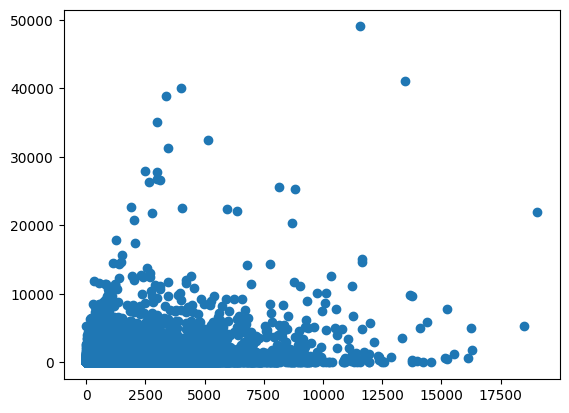

In [268]:
plt.scatter(df2['BALANCE'], df2['PURCHASES'])

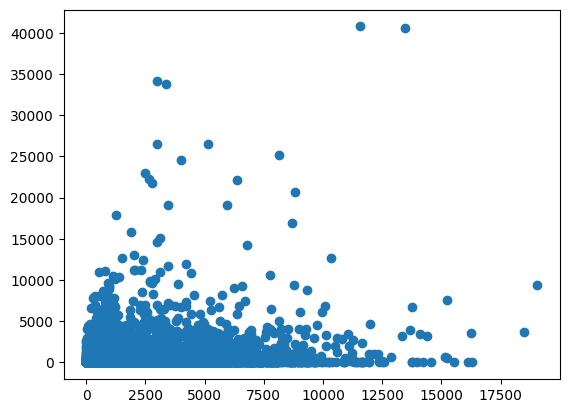

In [269]:
plt.scatter(df2['BALANCE'], df2['ONEOFF_PURCHASES'])

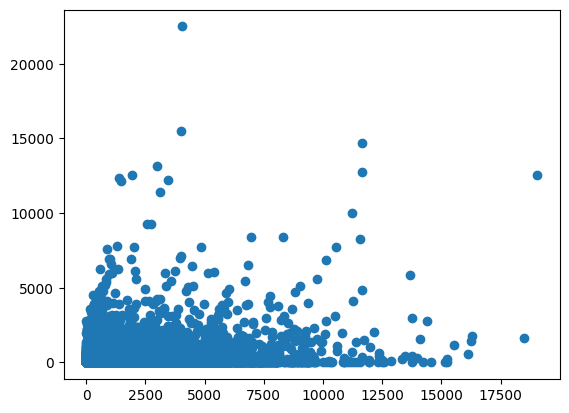

In [270]:
plt.scatter(df2['BALANCE'], df2['INSTALLMENTS_PURCHASES'])

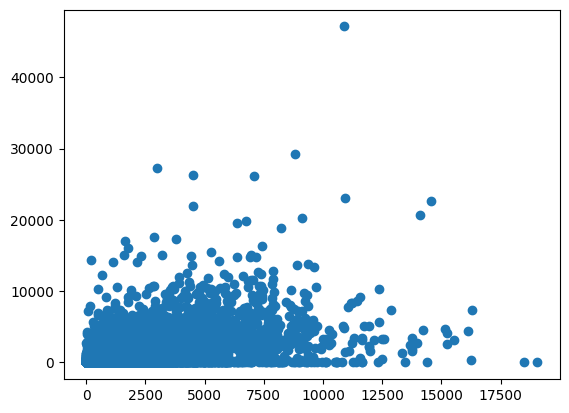

In [271]:
plt.scatter(df2['BALANCE'], df2['CASH_ADVANCE'])

In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

<Axes: xlabel='PRC_FULL_PAYMENT', ylabel='PAYMENTS'>

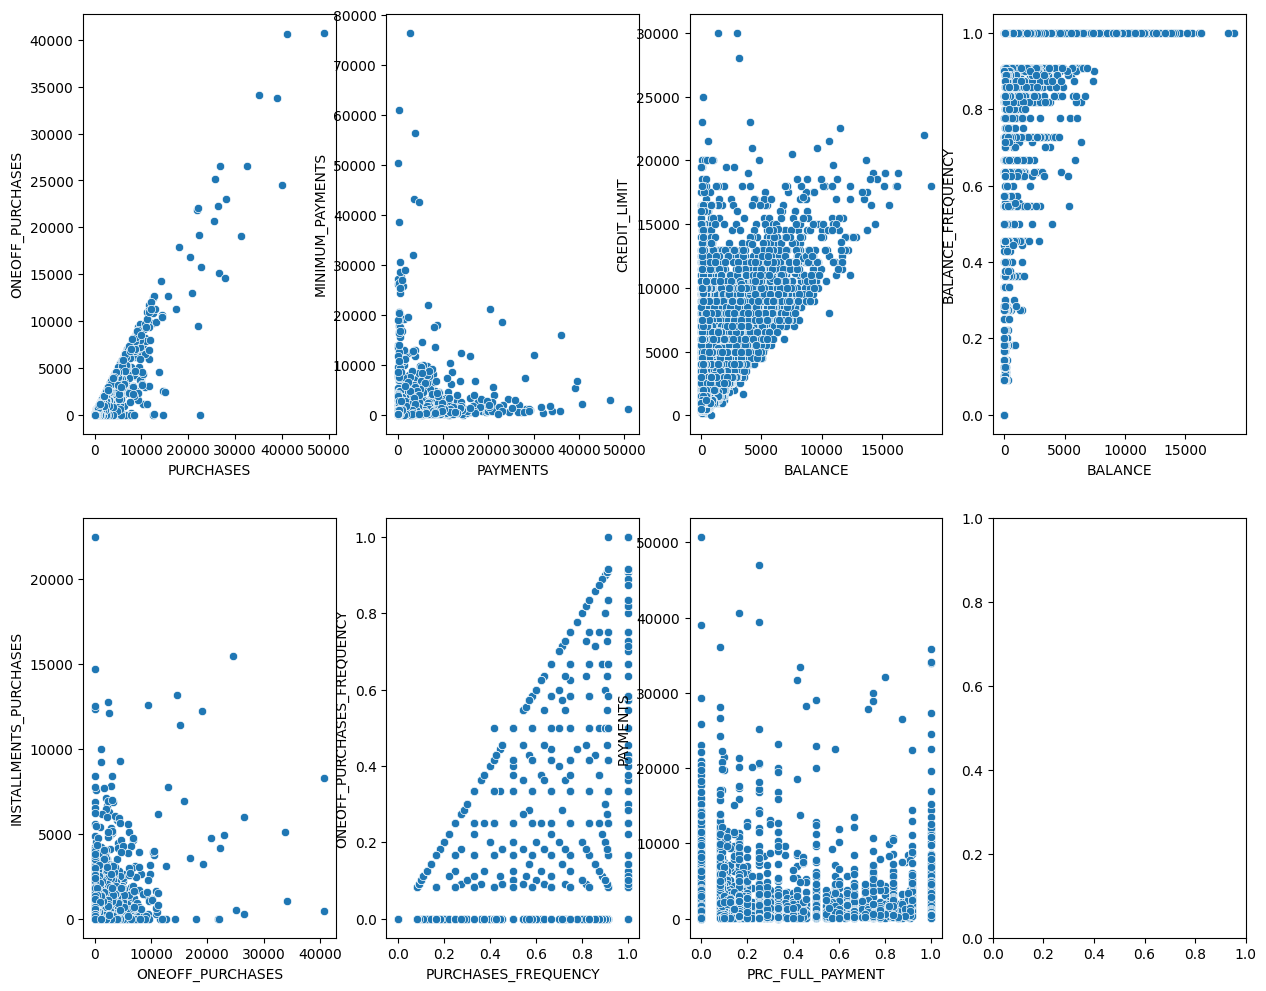

In [274]:
fig, axs = plt.subplots(2,4, figsize=(15,12))
sns.scatterplot(x=df2['PURCHASES'], y=df2['ONEOFF_PURCHASES'], ax=axs[0][0])
sns.scatterplot(x=df2['PAYMENTS'], y=df2['MINIMUM_PAYMENTS'], ax=axs[0][1])
sns.scatterplot(x=df2['BALANCE'], y=df2['CREDIT_LIMIT'], ax=axs[0][2])
sns.scatterplot(x=df2['BALANCE'], y=df2['BALANCE_FREQUENCY'], ax=axs[0][3])
sns.scatterplot(x=df2['ONEOFF_PURCHASES'], y=df2['INSTALLMENTS_PURCHASES'], ax=axs[1][0])
sns.scatterplot(x=df2['PURCHASES_FREQUENCY'], y=df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[1][1])
sns.scatterplot(x=df2['PRC_FULL_PAYMENT'], y=df2['PAYMENTS'], ax=axs[1][2])

In [275]:
df2['BALANCE'].describe()

count     8949.000000
mean      1564.647593
std       2081.584016
min          0.000000
25%        128.365782
50%        873.680279
75%       2054.372848
max      19043.138560
Name: BALANCE, dtype: float64

In [277]:
import warnings
warnings.filterwarnings("ignore")

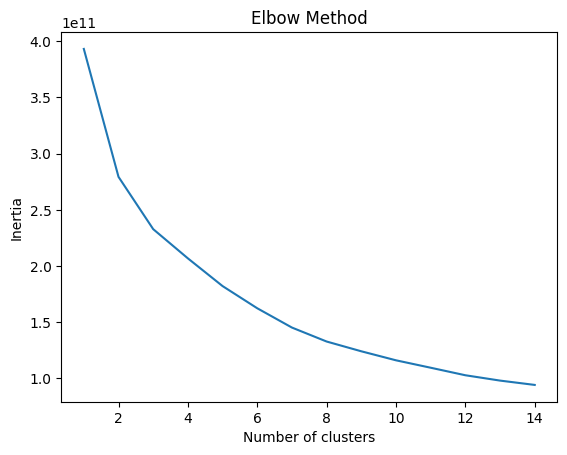

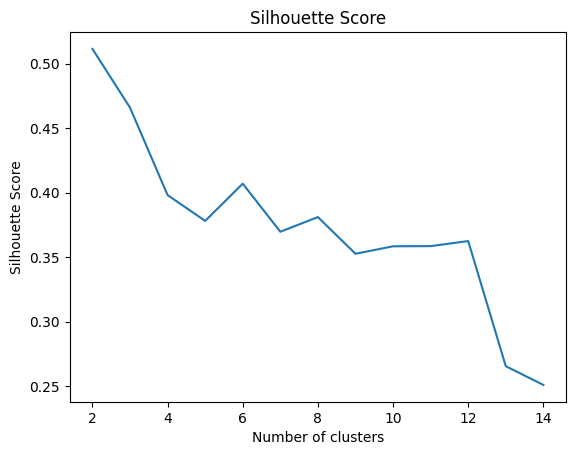

In [278]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df3, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

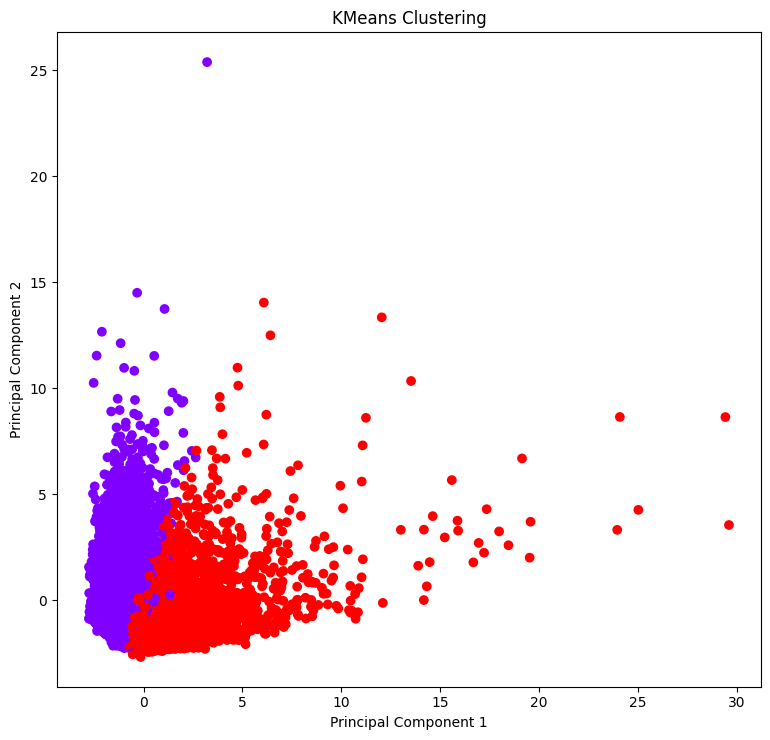

In [287]:
scaler = StandardScaler()
X = scaler.fit_transform(df3)

pca = PCA(n_components=17)
X_pca = pca.fit_transform(X)

K = 2
kmeans = KMeans(n_clusters=K, random_state=0).fit(X_pca)
plt.figure(figsize=(15, 7.5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()


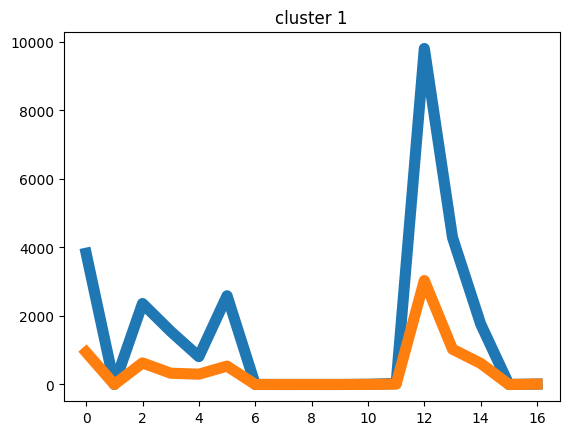

In [290]:
K = 2
kmeans = KMeans(n_clusters=K, random_state=0).fit(df3)

for c in range(K):
    plt.plot(kmeans.cluster_centers_[c], linewidth = 8)
    plt.title("cluster "+str(c))

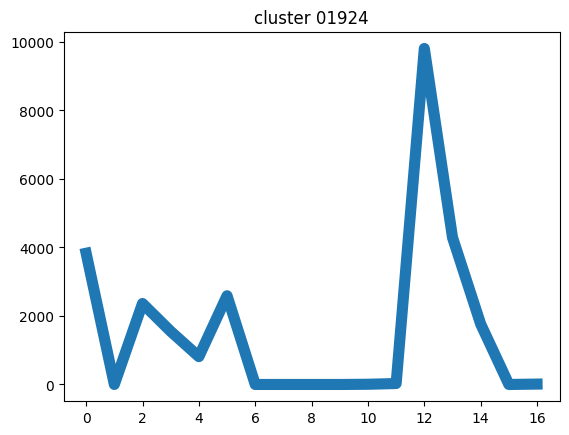

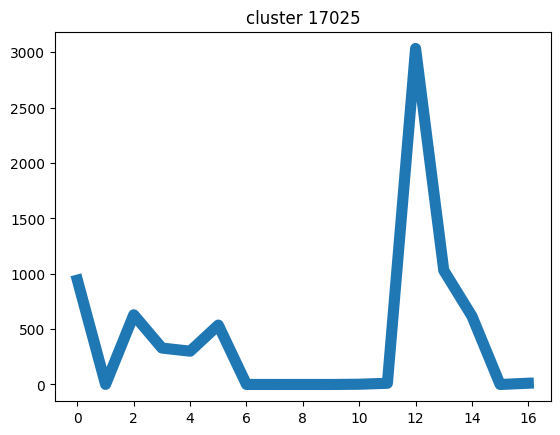

In [288]:
K = 2
kmeans = KMeans(n_clusters=K, random_state=0).fit(df3)

# create plots

plt.plot(kmeans.cluster_centers_[0], linewidth=8)
plt.title("cluster "+str(0) + str(sum(kmeans.labels_==0)))
plt.show()

plt.plot(kmeans.cluster_centers_[1], linewidth=8)
plt.title("cluster "+str(1) + str(sum(kmeans.labels_==1)))
plt.show()

In [291]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [293]:
from sklearn.preprocessing import normalize

data_scaled = normalize(df3)
data_scaled = pd.DataFrame(data_scaled, columns = df3.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


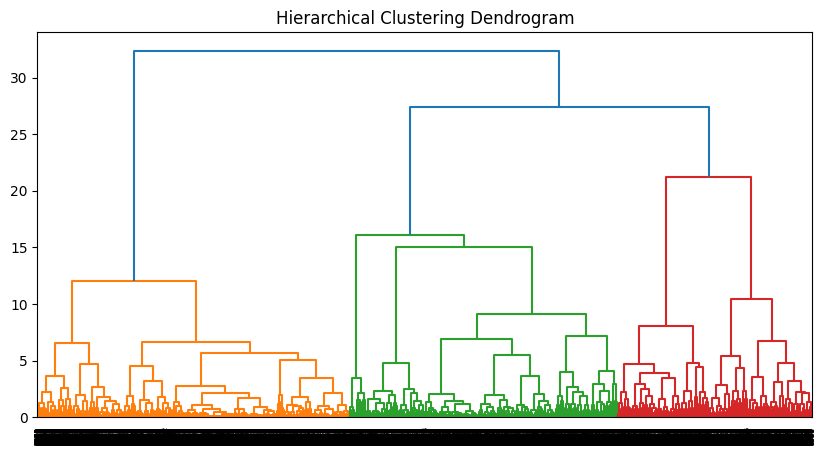

In [294]:
Z = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [302]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)

In [303]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

DBSCAN Silhouette Score: -0.25355372006274746


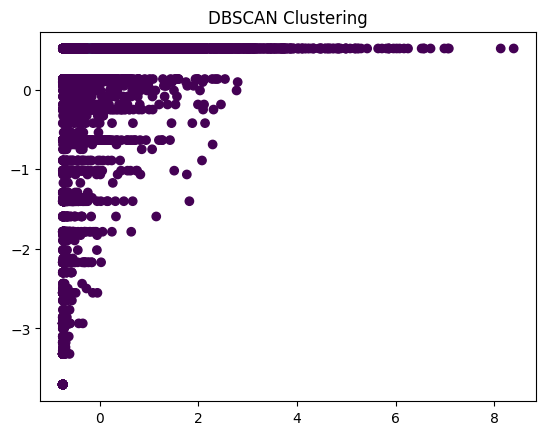

In [305]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()
